<a href="https://colab.research.google.com/github/kristianbagus/project/blob/main/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation Analysis

Sebuah perusahaan yang anonim mempunyai data tentang informasi pelanggannya. Dari data ini pelanggan akan dikelompokan berdasarkan beberapa cluster dan akan dianalisa bagaimana perilaku tiap-tiap pelanggan berdasarkan kelompoknya. Hasil analisa akan digunakan untuk mengembangkan bisnis kedepannya. 

Dataset ini diambil dari situs Kaggle: https://www.kaggle.com/imakash3011/customer-personality-analysis

## Download dan Extract Data dari Kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d imakash3011/customer-personality-analysis

  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 82.7MB/s]


In [ ]:
import zipfile
zipfile = zipfile.ZipFile('/content/customer-personality-analysis.zip', 'r')
zipfile.extractall()

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# Preview Dataset
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [ ]:
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Penjelasan Dataset

Berikut ini merupakan penjelasan dari masing-masing variabel yang ada pada dataset:

Informasi Pelanggan
1. ID : ID unik pelanggan
2. Year_Birth: Tahun lahir pelanggan
3. Education: Tingkat pendidikan pelanggan
4. Marital_Status: Status perkawinan pelanggan
5. Income: Total pendapatan rumah tangga pelanggan per tahun
6. Kidhome: Jumlah anak-anak di keluarga pelanggan
7. Teenhome: Jumlah remaja di keluarga pelanggan
8. Dt_Customer: Tanggal pelanggan bergabung
9. Recency: Jumlah hari sejak pembelian terakhir pelanggan
10. Complain: Apakah pelanggan komplain dalam kurun waktu 2 tahun. 1 = Ya dan 0 = Tidak.

Produk
1. MntWines: Jumlah pembelian wine dalam kurun waktu 2 tahun.
2. MntFruits: Jumlah pembelian buah-buahan dalam kurun waktu 2 tahun.
3. MntMeatProducts: Jumlah pembelian daging dalam kurun waktu 2 tahun.
4. MntFishProducts: Jumlah pembelian ikan dalam kurun waktu 2 tahun.
5. MntSweetProducts: Jumlah pembelian manisan dalam kurun waktu 2 tahun.
6. MntGoldProds: Jumlah pembelian emas dalam kurun waktu 2 tahun.

Promosi

1. NumDealsPurchases: Jumlah pembelian dengan diskon.
2. AcceptedCmp1: 1 jika pelanggan menerima penawaran dari kampanye pemasaran pertama, 0 jika tidak.
3. AcceptedCmp2: 1 jika pelanggan menerima penawaran dari kampanye pemasaran kedua, 0 jika tidak.
4. AcceptedCmp3: 1 jika pelanggan menerima penawaran dari kampanye pemasaran ketiga, 0 jika tidak.
5. AcceptedCmp4: 1 jika pelanggan menerima penawaran dari kampanye pemasaran keempat, 0 jika tidak.
6. AcceptedCmp5: 1 jika pelanggan menerima penawaran dari kampanye pemasaran kelima, 0 jika tidak.
7. Response: 1 jika pelanggan menerima penawaran dari kampanye pemasaran terakhir, 0 jika tidak.

Tempat pembelian

1. NumWebPurchases: Jumlah pembelian lewat situs perusahaan.
2. NumCatalogPurchases: Jumlah pembelian lewat catalog.
3. NumStorePurchases: Jumlah pembelian lewat toko secara langsung.
4. NumWebVisitsMonth: Jumlah kunjungan pada situs perusahaan selama 1 bulan terakhir.

Lain-lain
1. Z_CostContact: Tidak dijelaskan sehingga akan dihapus.
2. Z_Revenue: Tidak dijelaskan sehingga akan dihapus.

## Data Cleansing

### 1. Delete variabel tidak diperlukan
Karena variabel 'Z_CostContact' dan 'Z_Revenue' tidak diperlukan, maka kedua variabel tersebut akan dihapus.

In [ ]:
# Drop variabel yang tidak diperlukan
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

### 2. Convert ke datetime
Variabel 'Dt_Customer' yang seharusnya bertipe datetime juga masih bertipe object, oleh karena itu perlu dirubah.

In [ ]:
# Merubah menjadi tipe datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Cek tipe data
df['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

### 3. Cek dan Handle Missing Value
Setelah itu perlu dilakukan pengecekan missing value, jika ada maka perlu diatasi.

In [ ]:
# Mengecek missing value
df.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

Karena pada variabel income masih ada missing value, maka missing value akan diatasi dengan menghapus data tersebut.

In [ ]:
# Mengatasi missing value
df.dropna(inplace=True)

### 4. Cek dan Handle Outliers
Karena umumnya pada variabel numerik terdapat outliers, maka perlu dicek apakah ada outliers pada variabel-variabel tersebut.

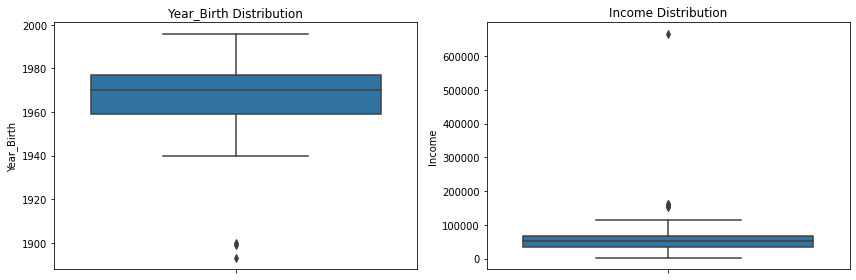

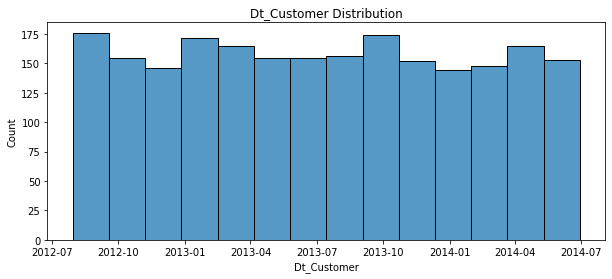

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.boxplot(ax=ax[0], y=df['Year_Birth'])
sns.boxplot(ax=ax[1], y=df['Income'])
ax[0].set_title('Year_Birth Distribution')
ax[1].set_title('Income Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(x=df['Dt_Customer'])
plt.title('Dt_Customer Distribution')
plt.show()

Setelah diteliti, variabel Year_Birth memiliki outliers dengan pelanggan lahir di bawah tahun 1910. Variabel Income memiliki beberapa outliers di atas sekitar 130.000. Variabel Dt_Customer tidak memiliki data yang anomali. Kali ini, outliers yang ada akan ditangani dengan cara dihapus.

In [ ]:
# Remove Outliers
df.drop(df.loc[df['Year_Birth']<= 1910].index, inplace=True)
df.drop(df.loc[df['Income']>= 130000].index, inplace=True)

# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2205 non-null   int64         
 1   Year_Birth           2205 non-null   int64         
 2   Education            2205 non-null   object        
 3   Marital_Status       2205 non-null   object        
 4   Income               2205 non-null   float64       
 5   Kidhome              2205 non-null   int64         
 6   Teenhome             2205 non-null   int64         
 7   Dt_Customer          2205 non-null   datetime64[ns]
 8   Recency              2205 non-null   int64         
 9   MntWines             2205 non-null   int64         
 10  MntFruits            2205 non-null   int64         
 11  MntMeatProducts      2205 non-null   int64         
 12  MntFishProducts      2205 non-null   int64         
 13  MntSweetProducts     2205 non-nul

Dari info tersebut terlihat bahwa variabel 'Z_CostContact' dan 'Z_Revenue' sudah dihapus, variabel 'Dt_Customer' sudah menjadi tipe datetime, dan jumlah baris telah berkurang karena missing value dan outliers yang sudah dihapus.



## Feature Engineering

### 1. Membuat kolom Age
Karena sudah terdapat kolom year_birth, maka kita bisa mengekstrak umur dari data tersebut. Kita bisa mencari tahu kapan dataset ini dibuat dengan cara melihat kolom Dt_Customer.

In [ ]:
df['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

Karena tahun maksimal dari Dt_Customer adalah sampai Juni 2014, maka diasumsikan data ini diambil di tahun 2015.

In [ ]:
df['Age'] = 2015 - df['Year_Birth']

### 2. Membuat kolom TotalPurchasedProduct dan TotalNumPurchases
Karena dalam data sudah ada jumlah pembelian masing-masing produk namun belum ada total keseluruhan, maka akan ditambahkan jumlah total semua produk yang telah dibeli pelanggan. Selain itu, juga akan dibuat kolom baru total berapa kali pelanggan berbelanja.

In [ ]:
df['TotalPurchasedProduct'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumWebPurchases'] + df['NumStorePurchases']

### 3. Membuat kolom TotalKidTeen

Untuk mengetahui berapa total anak-anak dan remaja yang tinggal bersama pelanggan, maka akan dibuat kolom baru bernama TotalKidTeen

In [ ]:
df['TotalKidTeen'] = df['Kidhome'] + df['Teenhome']

### 4. Menyederhanakan kolom Marital_Status
Karena dalam kolom Marital_Status terdapat banyak sekali kategori, maka kategorinya akan disederhanakan menjadi yang menjalani hubungan (In Relationship) atau yang tidak menjalani hubungan (Single).

In [ ]:
# Cek kategori kolom Marital_Status
print('Before :', df['Marital_Status'].value_counts().index)

# Menyederhanakan kategori
df['Marital_Status'] = df['Marital_Status'].replace({'Married': 'In Relationship',
                                                    'Together': 'In Relationship',
                                                    'Divorced': 'Single',
                                                    'Widow': 'Single', 
                                                    'Alone': 'Single',
                                                    'YOLO': 'Single',
                                                    'Absurd': 'Single'})

# Cek kategori kolom Marital_Status
print('After :', df['Marital_Status'].value_counts().index)

Before : Index(['Married', 'Together', 'Single', 'Divorced', 'Widow', 'Alone', 'Absurd',
       'YOLO'],
      dtype='object')
After : Index(['In Relationship', 'Single'], dtype='object')


## Exploratory Data Analysis



### 1. Statistik Deskriptif

In [ ]:
df.describe().round(2)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,TotalPurchasedProduct,TotalNumPurchases,TotalKidTeen
count,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00
mean,5585.44,1968.90,51622.09,0.44,0.51,49.01,306.16,26.40,165.31,37.76,27.13,44.06,2.32,4.10,2.65,5.82,5.34,0.07,0.07,0.07,0.06,0.01,0.01,0.15,46.10,606.82,14.02,0.95
std,3247.55,11.71,20713.06,0.54,0.54,28.93,337.49,39.78,217.78,54.82,41.13,51.74,1.89,2.74,2.80,3.24,2.41,0.26,0.26,0.26,0.25,0.12,0.09,0.36,11.71,601.68,7.66,0.75
min,0.00,1940.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,5.00,0.00,0.00
25%,2815.00,1959.00,35196.00,0.00,0.00,24.00,24.00,2.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,38.00,69.00,7.00,0.00
50%,5455.00,1970.00,51287.00,0.00,0.00,49.00,178.00,8.00,68.00,12.00,8.00,25.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45.00,397.00,14.00,1.00
75%,8418.00,1977.00,68281.00,1.00,1.00,74.00,507.00,33.00,232.00,50.00,34.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,56.00,1047.00,20.00,1.00
max,11191.00,1996.00,113734.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,262.00,321.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,75.00,2525.00,54.00,3.00


### 2. Univariate Analysis

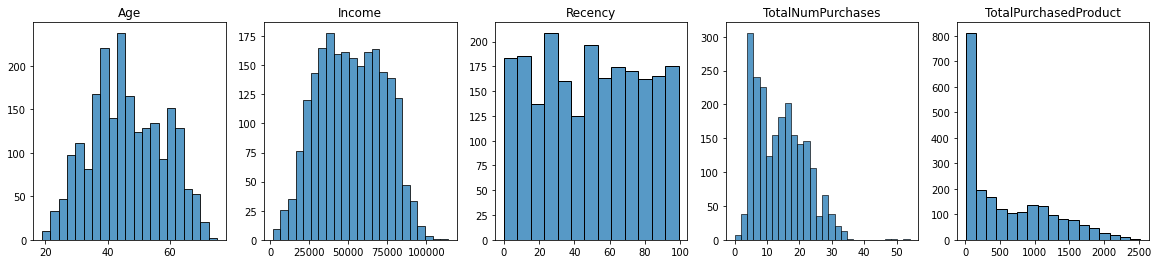

In [ ]:
fig, axes = plt.subplots(1,5,figsize=(20,4))
columns = ['Age', 'Income', 'Recency', 'TotalNumPurchases', 'TotalPurchasedProduct']
for column, ax in zip(columns, axes.flat):
    sns.histplot(x=df[column],ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('')

Dari histogram diatas terlihat bahwa distribusi usia dan pendapatan memiliki distribusi yang normal. Rata-rata usia pelanggan adalah 45 tahun, dengan pelanggan terbanyak di usia 35-45 tahun. Sedangakan untuk pendapatan mayoritas memiliki pendapatan antara 20.000 sampai 85.000.

Distribusi dari recency memiliki distribusi yang uniform atau sama. Hal ini menandakan selang waktu pelanggan untuk membeli lagi tersebar diantara 0-100 hari.

Lalu, distribusi dari TotalNumPurchases dan TotalPurchasedProduct memiliki distribusi skewed. Hal ini menunjukkan bahwa mayoritas pelanggan membeli sedikit produk dan membeli dalam frekuensi yang rendah.

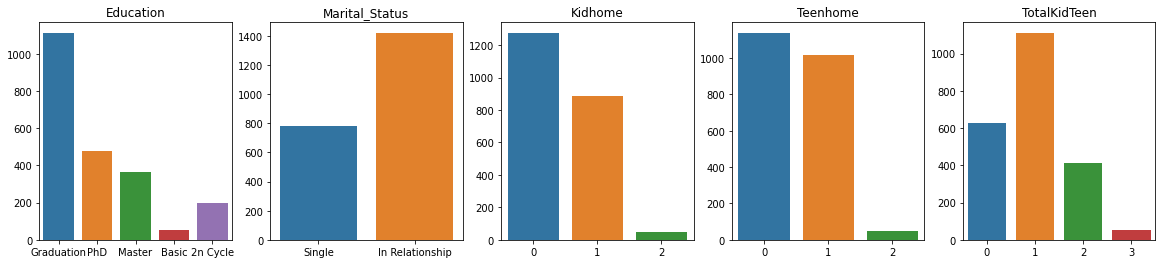

In [ ]:
fig, axes = plt.subplots(1,5,figsize=(20,4))
columns = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'TotalKidTeen']
for column, ax in zip(columns, axes.flat):
    sns.countplot(x=df[column], ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('')

Dilihat dari pendidikan, mayoritas pelanggan berasal dari kalangan Graduation, PhD dan Master; sisanya merupakan 2n Cycle dan Basic. Sedangkan dari marital status, terlihat bahwa 2 dari 3 pelanggan sudah menjalani hubungan.

Jika dijumlah antara anak-anak dan remaja, maka mayoritas pelanggan memiliki 1 anak/remaja. Sisanya tidak memiliki anak/remaja atau memiliki 2 anak/remaja, dan sangat sedikit yang memiliki 3 anak/remaja.

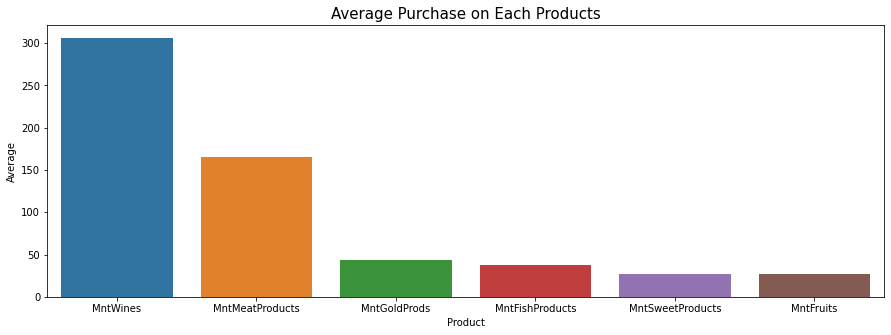

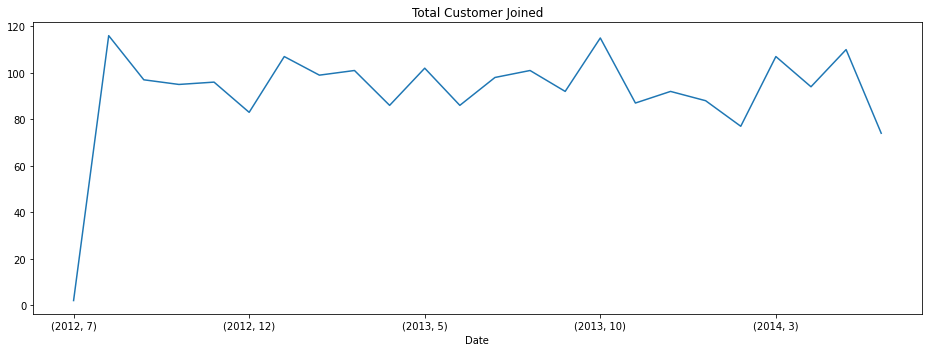

In [ ]:
avgproduct = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean(axis=0).sort_values(ascending=False)
avgproduct = pd.DataFrame(list(avgproduct.items()), columns=['Product', 'Average'])

plt.figure(figsize=(15,5))
plt.title('Average Purchase on Each Products', fontsize=15)
sns.barplot(data=avgproduct, x='Product', y='Average')
plt.show()

plt.figure(figsize=(13,5))
dt_cust = df.groupby(by=[df['Dt_Customer'].dt.year, df['Dt_Customer'].dt.month])['ID'].count()
dt_cust.plot()
plt.title('Total Customer Joined')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

Secara keseluruhan produk yang paling sering dibeli adalah wines, dan produk yang jarang dibeli adalah Sweet dan Fruits.

Dilihat dari tanggal bergabung, secara periodik perusahaan mendapatkan rata-rata jumlah pelanggan yang sama. Hal ini menandakan bahwa kemampuan perusahaan untuk mengakusisi pelanggan baru adalah stagnan.
### Multivariate Analysis

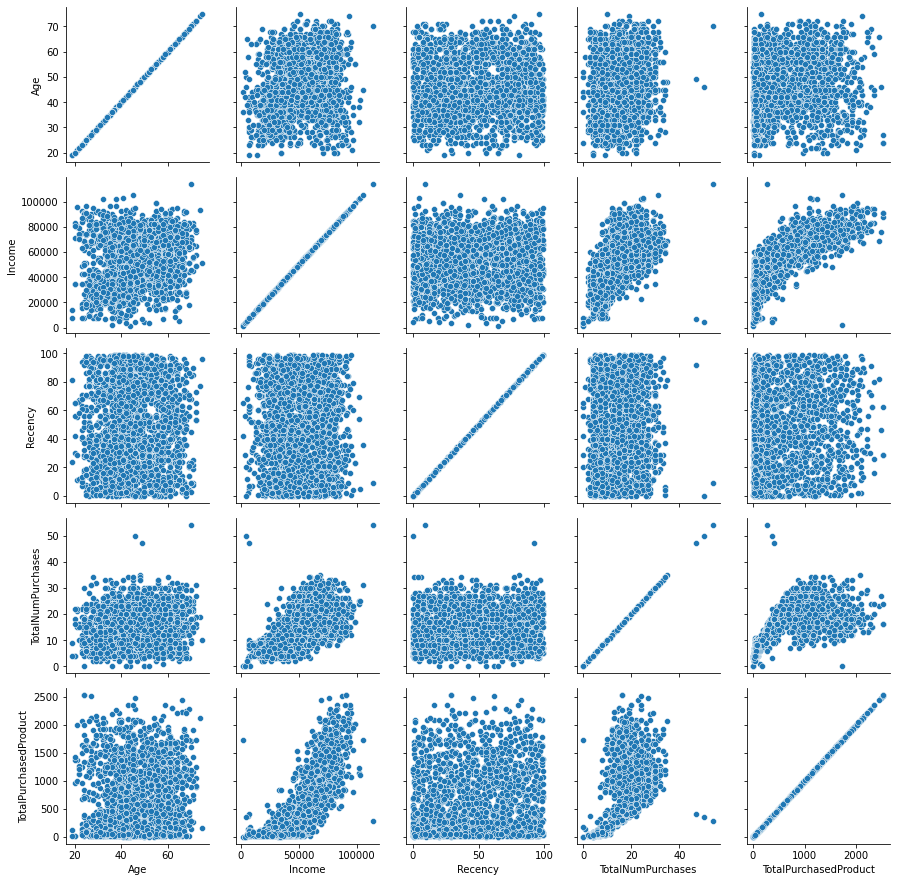

In [ ]:
columns = ['Age', 'Income', 'Recency', 'TotalNumPurchases', 'TotalPurchasedProduct']
g = sns.PairGrid(df[columns])
g.map(sns.scatterplot)

Jika dilihat, umur pelanggan tidak berkolerasi dengan Recency, TotalNumPurchases, maupun TotalPurchasedProduct. Ini berarti umur pelanggan tidak berpengaruh pada perilaku pembelian.

Jika dilihat dari pendapatan, pendapatan pelanggan sedikit berkorelasi dengan TotalNumPurchases, maupun TotalPurchasedProduct. Hal ini cukup masuk akal, karena frekuensi dan jumlah pembelian biasanya dipengaruhi oleh jumlah pendapatan.





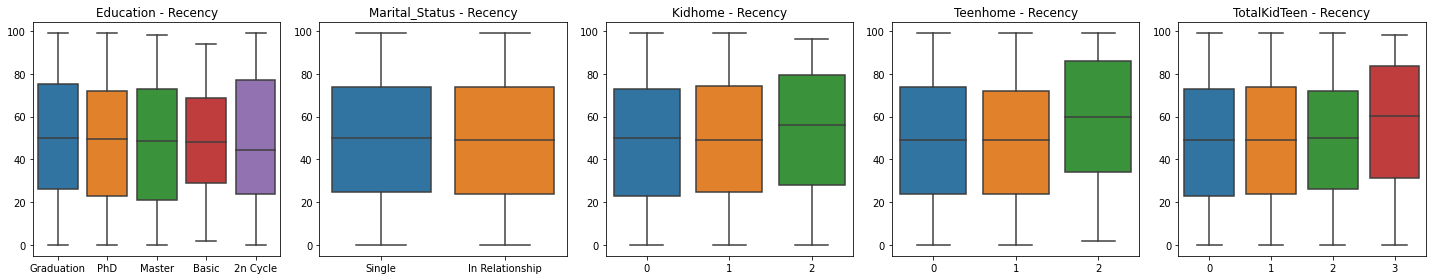

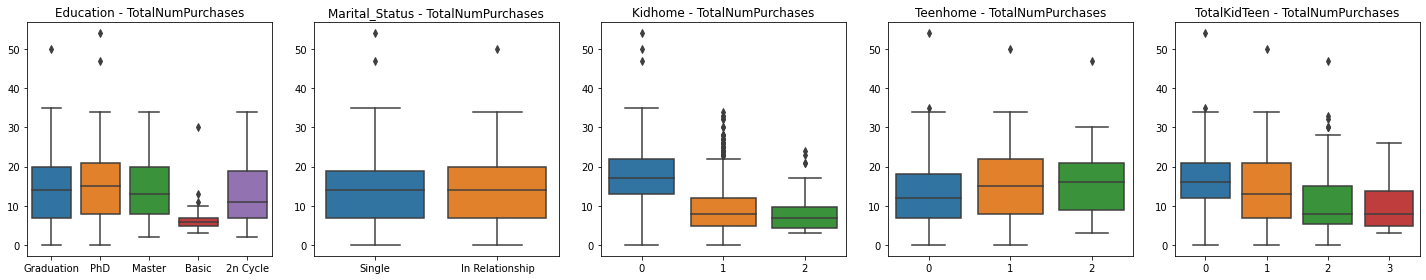

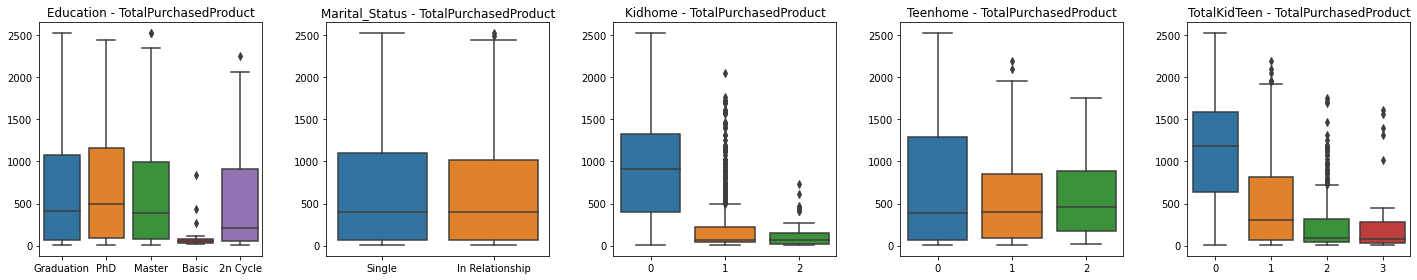

In [ ]:
rows = ['Recency', 'TotalNumPurchases', 'TotalPurchasedProduct']
columns = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'TotalKidTeen']

for row in rows:
  fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(20,4))
  for column, ax in zip(columns, axes.flat):
      sns.boxplot(data=df, y=row, x=column, ax=ax)
      ax.set_title(column + ' - ' + row)
      ax.set_xlabel('')
      ax.set_ylabel('')
  # plt.suptitle('Distribution by Clusters', size=16)
  plt.tight_layout()
  plt.show()

Dilihat dari pendidikan, pelanggan yang memiliki pendidikan Basic ternyata melakukan pembelian yang sedikit dan frekuensi yang rendah dibandingkan dengan yang lain. Lalu, jika dilihat dari martial status, ternyata status tidak mempengaruhi recency, frekuensi pembelian dan jumlah pembelian.

Yang menarik di sini adalah hubungan antara jumlah anak/remaja dengan frekuensi dan jumlah pembelian. Nampaknya dari data yang ada, pelanggan dengan jumlah anak/remaja yang sedikit melakukan frekuensi pembelian yang lebih sering dan jumlah pembelian yang lebih banyak.

## Clustering dengan K-mean

Untuk mengelompokkan para pelanggan, kali ini akan digunakan algoritma K-mean. Jika mengacu pada model pengelompokkan dengan RFM (Recency, Frequency, Monetary), maka variabel yang digunakan adalah adalah Recency, TotalNumPurchases untuk mewakili Frequency, dan TotalPurchasedProduct untuk mewakili Monetary.



### 1. Standardisasi Feature

Karena K-mean sensitif terhadap skala dari variabel yang berbeda-beda, maka perlu dilakukan standardisasi supaya tidak ada variabel yang mendominasi pengelompokan.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature yang digunakan
feature = ['Recency', 'TotalNumPurchases', 'TotalPurchasedProduct']

# Standardisasi  
df_model = StandardScaler().fit_transform(df[feature])  

# Membuat DataFrame  
df_model = pd.DataFrame(data=df_model, index=df.index, columns=df[feature].columns)  

### 2. Menentukan Jumlah Cluster
Untuk menetukkan jumlah cluster yang optimal, kita bisa menggunakan grafik cluster vs inertia.

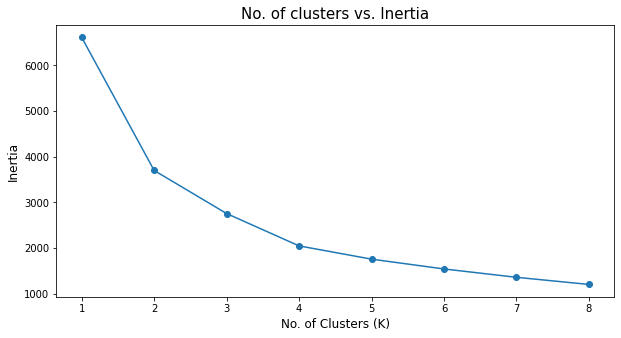

In [ ]:
from sklearn.cluster import KMeans

options = range(1,9)
inertias = []

# Cluster vs Inertia
for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(df_model)
    inertias.append(model.inertia_)

# Plot hasil
plt.figure(figsize=(10,5))    
plt.title("No. of clusters vs. Inertia", fontsize=15)
plt.plot(options, inertias, '-o')
plt.xlabel('No. of Clusters (K)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.show()

Karena setelah 4 cluster tidak ada perbedaan yang signifikan pada inertia, maka pada model ini akan dipilih 4 sebagai jumlah cluster. 

### 3. Membuat Model

In [ ]:
# Inisiasi Model
model = KMeans(n_clusters=4, random_state=42).fit(df_model)

# Membuat Cluster
predict = model.predict(df_model)

# Menambahkan Cluster pada Variabel
df_model['clusters'] = predict

### 4. Interpretasi Model

Setelah membuat cluster, perlu kita interpretasi bagaimana cluster-cluster tersebut terbentuk. 

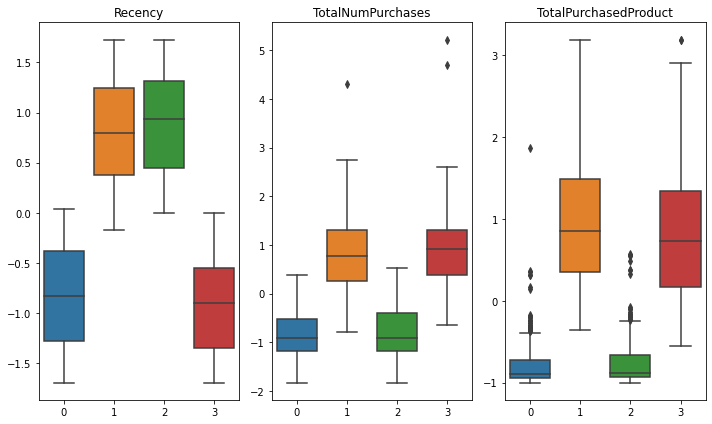

In [ ]:
# Plot Distribusi
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(10,6))
for column, ax in zip(feature, axes.flat):
    sns.boxplot(data=df_model, x='clusters', y=column, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('')
# plt.suptitle('Distribution by Clusters', size=16)
plt.tight_layout()
plt.show()

Dilihat dari boxplot diatas, kita bisa melihat kelompok pelanggan berdasarkan perilaku pembeliannya.

Cluster 0 - Merupakan pelanggan dengan recency yang rendah, frekuensi pembelian yang rendah, dan pembeli dengan produk yang sedikit. Cluster ini merupakan cluster pelanggan baru, dan akan dinamai *New Customers*.

Cluster 1 - Merupakan pelanggan dengan recency yang tinggi, frekuensi pembelian yang tinggi, dan pembeli dengan produk yang banyak. Cluster ini merupakan cluster pelanggan lama yang dulunya pernah berbelanja dengan jumlah dan frekuensi yang sering, sehingga akan dinamai *Potential Champions*.

Cluster 2 - Merupakan pelanggan dengan recency yang tinggi, frekuensi pembelian yang rendah, dan pembeli dengan produk yang sedikit. Cluster ini merupakan cluster pelanggan yang churn, dan akan dinamai *Potential Lost*.

Cluster 3 - Merupakan pelanggan dengan recency yang rendah, frekuensi pembelian yang tinggi, dan pembeli dengan produk yang banyak. Cluster ini merupakan pelanggan paling berharga bagi perusahaan, sehingga akan dinamai *Champions*.

### 5. Add and Rename Cluster
Setelah mengetahui bagaimana cluster terbentuk, kita akan menamai cluster sesuai dengan nama yang sudah diberikan pada interpretasi sebelumnya.

In [ ]:
# Menambahkan cluster pada variabel utama
df['CustomerType'] = df_model['clusters']

# Mengganti nama cluster
df['CustomerType'] = df['CustomerType'].replace({0: 'New Customers', 1: 'Potential Champions', 2: 'Potential Lost', 3: 'Champions'})

### 6. Distribusi Pelanggan Berdasarkan Cluster

Setelah mendapatkan cluster yang diinginkan, ada baiknya bila kita melihat bagaimana distribusi pelanggan setelah dilakukan pengelompokkan.

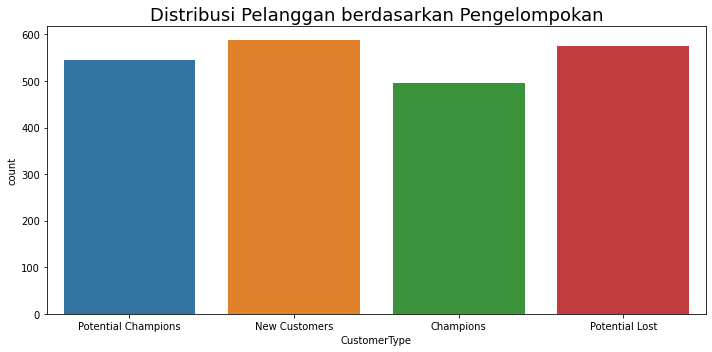

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['CustomerType'])
plt.title('Distribusi Pelanggan berdasarkan Pengelompokan', size=18)
plt.tight_layout()
plt.show()

Dari bar chart terlihat bahwa tiap-tiap cluster memiliki pelanggan sebesar 500-600 orang, yang menandakan bahwa tiap-tiap cluster memiliki jumlah yang cukup seimbang.

### 7. Export File Setelah Clustering

In [ ]:
# Export to csv
df.to_csv('marketing_campaign_with_cluster.csv', index=False, sep=',')

## Perilaku Pelanggan berdasarkan Cluster

### 1. Perilaku Pembelian Produk

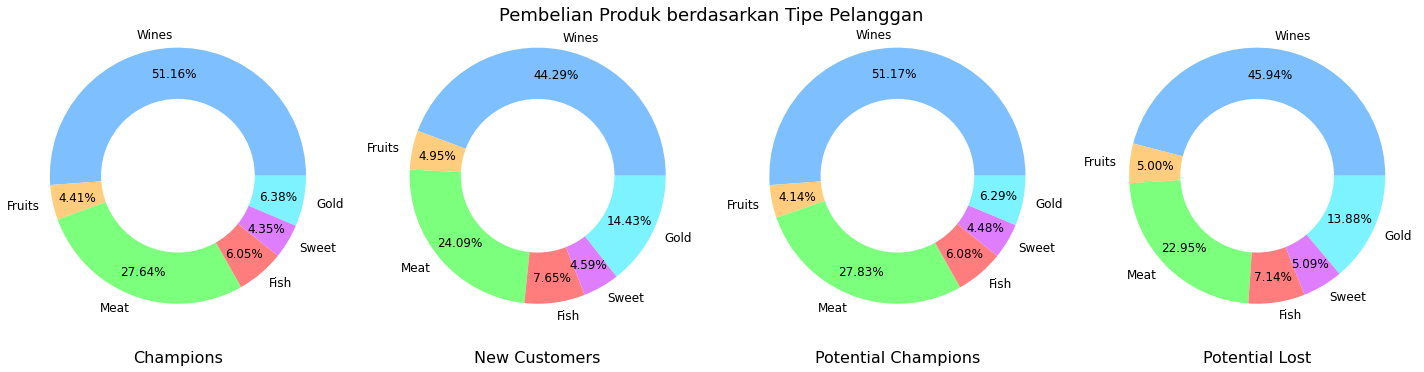

In [ ]:
# Membuat Variabel
clusterproduct = df.groupby(['CustomerType'])[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
clusterproduct.rename(columns={'MntWines':'Wines', 'MntFruits':'Fruits', 'MntMeatProducts':'Meat', 'MntFishProducts':'Fish', 'MntSweetProducts':'Sweet', 'MntGoldProds':'Gold'}, inplace=True)

# Plot chart
color =  ['#7dbfff', '#ffcd7d', '#7dff7e', '#ff7d7d', '#df7dff', '#7df3ff']
f, ax = plt.subplots(1,4,figsize=(20,5))
for i in range(0,4):
    ax[i].pie(x=clusterproduct.iloc[i,:], labels=clusterproduct.columns, colors=color, autopct='%1.2f%%', pctdistance=0.8, textprops={'fontsize': 12})
    ax[i].set_title(clusterproduct.index[i], size=16, y=-0.1)
    centre_circle = plt.Circle((0,0),0.60,fc='white')
    ax[i].add_artist(centre_circle)
    
plt.suptitle('Pembelian Produk berdasarkan Tipe Pelanggan', size=18)
plt.tight_layout()
plt.show()

Pembelian jenis produk yang dilakukan antar tipe pelanggan memiliki pola yang mirip. Produk Wines dan Meat merupakan produk yang paling disukai, sedangkan produk Sweet and Fruits merupakan produk yang paling jarang dibeli.

### 2. Kontribusi Total Pembelian Produk

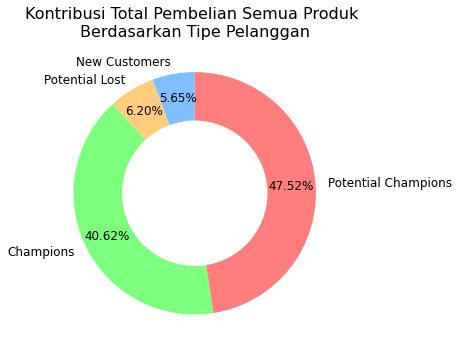

In [ ]:
cluster = df.groupby(['CustomerType'])['TotalPurchasedProduct'].sum().sort_values()

plt.figure(figsize=(10,5))
plt.pie(x=cluster.values, labels=cluster.index, colors=color, autopct='%1.2f%%', pctdistance=0.8, startangle=90, textprops={'fontsize': 12})
centre_circle = plt.Circle((0,0),0.60,fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Kontribusi Total Pembelian Semua Produk \nBerdasarkan Tipe Pelanggan', size=16)
plt.tight_layout()
plt.show()

Ternyata dari semua pembelian yang telah dilakukan, hampir 88% dilakukan oleh pelanggan *Champion* dan *Potential Champion*. Untuk itu, ada baiknya perusahaan memprioritaskan pelanggan-pelanggan tersebut karena kontribusinya sangat besar untuk perusahaan.

### 3. Pemilihan Tempat Belanja

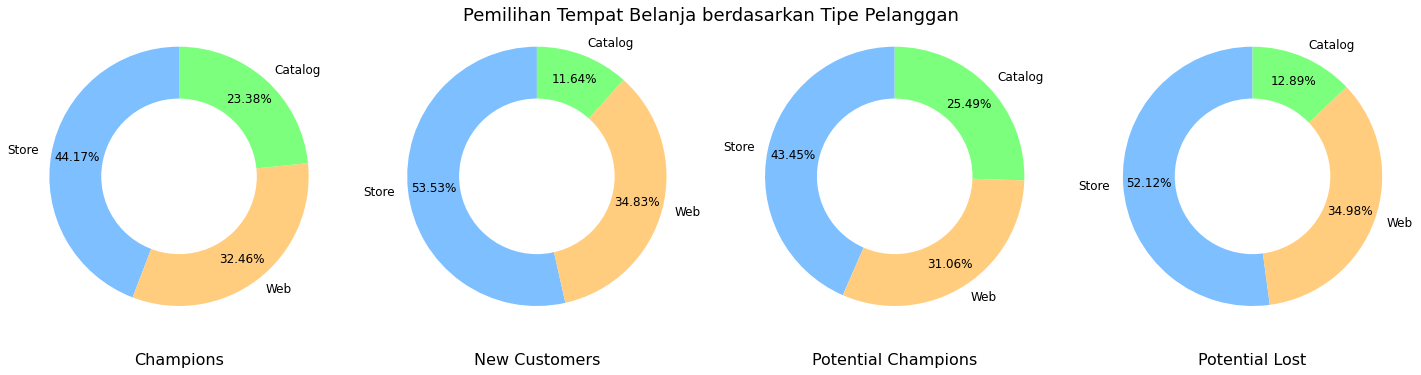

In [ ]:
# Membuat Variabel
clusterpruchase = df.groupby(['CustomerType'])[['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases']].sum()
clusterpruchase.rename(columns={'NumWebPurchases':'Web', 'NumCatalogPurchases':'Catalog', 'NumStorePurchases':'Store'}, inplace=True)

# Plot chart
color =  ['#7dbfff', '#ffcd7d', '#7dff7e']
f, ax = plt.subplots(1,4,figsize=(20,5))
for i in range(0,4):
    ax[i].pie(x=clusterpruchase.iloc[i,:], labels=clusterpruchase.columns, colors=color, autopct='%1.2f%%', pctdistance=0.8, startangle=90, textprops={'fontsize': 12})
    ax[i].set_title(clusterpruchase.index[i], size=16, y=-0.1)
    centre_circle = plt.Circle((0,0),0.60,fc='white')
    ax[i].add_artist(centre_circle)
    
plt.suptitle('Pemilihan Tempat Belanja berdasarkan Tipe Pelanggan', size=18)
plt.tight_layout()
plt.show()

Pembelian langsung dari toko masih menjadi tempat terfavorit semua tipe pelanggan, sedangkan tempat favorit kedua adalah lewat web, dan yang terakhir adalah lewat catalog. Jika kita lihat, pembelian lewat catalog lebih sering dilakukan oleh pelanggan tipe Champions dan Potential Champions dibandingkan New Customers dan Potential Lost.

### 4. Kunjungan Situs

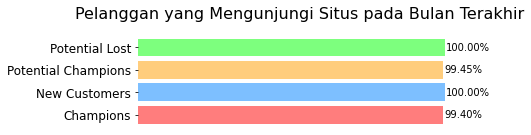

In [ ]:
# Membuat Variabel
clusterweb = df.groupby(['CustomerType'])['NumWebVisitsMonth'].mean()
webvisit = df[df['NumWebVisitsMonth'] != 0].groupby(['CustomerType'])['ID'].nunique()
total_cust = df['CustomerType'].value_counts()
webvisit = webvisit / total_cust

# Plot chart
color = ['#ff7d7d', '#7dbfff', '#ffcd7d', '#7dff7e']
fig, ax = plt.subplots(figsize=(7,2))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
plt.barh(data=webvisit, y=webvisit.index, width=webvisit.values, color=color)
plt.title('Pelanggan yang Mengunjungi Situs pada Bulan Terakhir',  size=16, y=1.1)
for i, v in enumerate(list(webvisit.values)):
    plt.text(x=v+0.004, y=i , s='{:,.2%}'.format(v), va='center')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Dari bar chart diatas terlihat bahwa hampir semua pelanggan mengunjungi situs perusahaan setidaknya satu kali dalam bulan ini.

### 5. Pembelian dengan Diskon

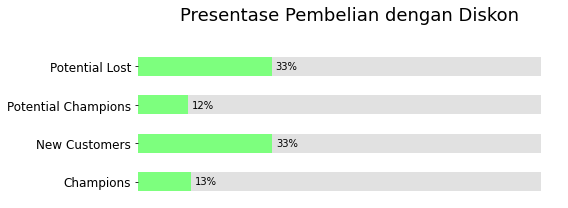

In [ ]:
# Membuat Variabel
clusterpromotion = df.groupby(['CustomerType'])[['NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases']].sum()
clusterpromotion['Total_Purchase'] = clusterpromotion['NumStorePurchases'] + clusterpromotion['NumWebPurchases'] + clusterpromotion['NumCatalogPurchases']
clusterpromotion['DiscProportion'] = clusterpromotion['NumDealsPurchases'] / clusterpromotion['Total_Purchase']
clusterpromotion['RestProportion'] = 1 - clusterpromotion['DiscProportion']
disc = clusterpromotion[['DiscProportion', 'RestProportion']]

# Plot chart
color =  ['#7dff7e','#e1e1e1']
ax = disc.plot(kind='barh', figsize=(8,3), stacked=True, color=color, legend=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
plt.ylabel('')
plt.title('Presentase Pembelian dengan Diskon\n',  size=18, y=1)
for i, v in enumerate(list(clusterpromotion['DiscProportion'])):
    plt.text(x=v+0.01, y=i , s='{:,.0%}'.format(v), va='center')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Nampaknya, promosi dengan cara diskon efektif digunakan untuk tipe pelanggan Potential Lost dan New Customers karena diskon menyumbang 33% dari total penjualan. Untuk pelanggan Champions dan Potential Champions, promosi dengan cara diskon menyumbang 12% dari total penjualan.

### 6. Efektivitas Kampanye Pemasaran

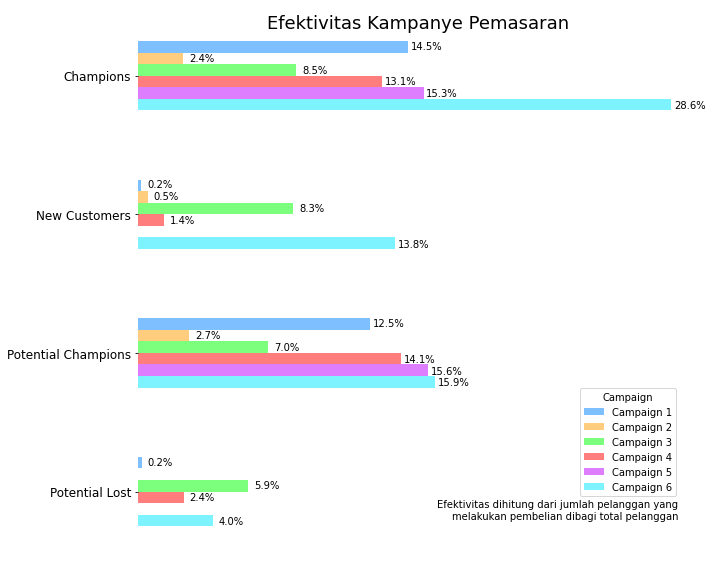

In [ ]:
# Membuat Variabel
campaign = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
clustercampaign = df.groupby(['CustomerType'])[campaign].sum()
total_cust = df['CustomerType'].value_counts()
newcol = []

# Membuat presentase efektifitas dan menamai kolom
for i, col in enumerate(campaign):
    clustercampaign[col] = clustercampaign[col] / total_cust
    name = 'Campaign ' + str(i+1)
    clustercampaign.rename(columns={col:name}, inplace=True)
    newcol.append(name)
    
# Plot chart
color =  ['#7dbfff', '#ffcd7d', '#7dff7e', '#ff7d7d', '#df7dff', '#7df3ff']
ax = clustercampaign.plot(kind='barh', figsize=(10,8), color=color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
plt.ylabel('')
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(0.78,0.32), loc='upper left', title='Campaign')
for j, col in enumerate(newcol):
    for i, v in enumerate(list(clustercampaign[col])):
        if v > 0.00001:
            plt.text(y=i-0.214+j*0.08565, x=v+0.010, s='{:,.1%}'.format(v), va='center', ha='center')
ax.invert_yaxis()
plt.title('Efektivitas Kampanye Pemasaran',  size=18, y=0.95)
plt.text(s='Efektivitas dihitung dari jumlah pelanggan yang\nmelakukan pembelian dibagi total pelanggan', x=0.29, y=3.2, ha='right')
plt.tight_layout()
plt.show()

Secara keseluruhan, Campaign 6 merupakan campaign yang paling efektif sejauh ini karena mampu menjangkau banyak tipe pelanggan, sedangkan Campaign ke 2 merupakan yang paling tidak efektif.

Jika dilihat dari tiap tipe pelanggan, pelanggan Champions dan Potential Champions cukup antusias dalam Campaign yang dilaksanakan perusahaan, sedangkan pelanggan New Customers dan Potential Lost kurang berminat dengan Campaign yang ada.

## Kesimpulan

1. Secara keseluruhan, pelanggan memiliki rata-rata usia 45 tahun; berpendapatan per tahun antara 20.000-85.000; mayoritas berpendidikan Graduate, PhD, dan Master; 2 dari 3 sudah memiliki pasangan; dan mayoritas memiliki 1 anak.
2. Kemampuan perusahaan dalam mengakusisi pelanggan baru cenderung stagnan.
3. Selang waktu pelanggan akan kembali berbelanja lagi adalah kurang dari 100 hari.
4. Clustering pelanggan berdasarkan model RFM dengan menggunakan K-Mean menghasilkan 4 cluster pelanggan.
5. Pelanggan Champions dan Potential Champions menyumbang hampir 88% dari total penjualan.
5. Produk paling sering dibeli adalah produk Wines dan Meat, produk yang paling jarang dibeli adalah Sweet dan Fruits.
6. Pembelian langsung dari toko masih menjadi tempat belanja terfavorit untuk semua tipe pelanggan, diikuti dengan berbelanja melalui web dan melalui catalog.
7. Hampir semua pelanggan mengunjungi situs setidaknya satu kali dalam kurun waktu 1 bulan terakhir.
8. Pelanggan New Customers dan Potential Lost tertarik dengan adanya diskon.
9. Campaign 6 merupakan kampanye pemasaran yang paling efektif untuk semua tipe pelanggan. Secara keseluruhan, pelanggan Champions dan Potential Champions tertarik dengan Campaign yang dilakukan perusahaan.


## Saran

1. Jika perusahaan ingin menumbuhkan bisnisnya, perusahaan bisa mempriortaskan pada strategi akusisi pelanggan. Hal ini dikarenakan dari data yang ada, kemampuan perusahaan dalam mengakusisi pelanggan baru  cenderung stagnan. Oleh karena itu, perlu dibentuk strategi baru untuk menarik pelanggan yang baru.
2. Masih terkait dengan pengembangan bisnis, perusahaan bisa melakukan ekspansi dengan membuka cabang toko fisik. Hal ini dikarenakan toko fisik masih menjadi tempat utama pembelian pelanggan.
3. Sweet dan fruits merupakan produk yang paling jarang dibeli. Untuk merangsang penjualannya, perusahaan bisa melakukan product bundling dengan produk unggulan seperti wines dan meat.
4. Karena situs hampir dikunjungi oleh seluruh pelanggan namun tidak menjadi tempat pembelian utama, situs bisa dimanfaatkan sebagai kanal informasi untuk promosi dan kampanye baru serta bisa dimanfaatkan sebagai galeri informasi dari produk-produk yang dijual. 
5. Untuk menarik penjualan dari pelanggan Potential Lost dan New Customers, akan lebih efektif dengan menggunakan diskon; sedangkan untuk menarik pelanggan Champions dan Potential Champions akan lebih efektif dengan menggunakan Campaign.
